In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
path = '/Users/natta/Documents/Study/DataSci_2020_2/03_DeepLearning/02_Homework/03_final_project/cryotherapy.csv'
df = pd.read_csv(path)
df

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1


# EDA
___
For this dataset, it is about result on patient curing warts using cryotherapy. In this dataset it is contains 6 features and 1 binary class label. 
* The 6 features including
    * Sex : Biological Sex of patient
    * Age : Age of patient
    * Time : Time usage in cryotherapy medication
    * Number_of_wart : The amount number of warts that patient have
    * Type : Type of warts that patient have
    * Area : Area of warts on patient
* 1 binary class label 
    * Result of treatment : The Resutlt of cryotherapy medication


In [409]:
# check data type & missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


From the result above, There is no missing value in this dataset.
some how it need to be re-check again due to 'info' method of pandas cannot detect null value if dataset contain missing data other than 'NaN'

In [410]:
# Print all unique value in each features to check for missing value
for i in df:
    unique = pd.unique(df[i]) 
    print('Feature: {}'.format(i))
    print('Number of unique class: {}'.format(len(unique)))
    print(unique)
    print('------------------------------------------------')


Feature: sex
Number of unique class: 2
[1 2]
------------------------------------------------
Feature: age
Number of unique class: 24
[35 29 50 32 67 41 36 59 20 34 21 15 17 23 27 18 22 16 28 40 30 24 19 63]
------------------------------------------------
Feature: Time
Number of unique class: 36
[12.    7.    8.   11.75  9.25 11.    3.5   4.5  11.25 10.75  6.    2.
  3.75  5.25  8.75  4.25  5.75  5.5   8.5   4.75  9.75  2.5   0.5   9.5
  7.25 10.5   2.75  5.    1.5  11.5  10.    4.   10.25  7.75  0.25  8.25]
------------------------------------------------
Feature: Number_of_Warts
Number of unique class: 12
[ 5  1  7  2  3 12  6  9 11  4  8 10]
------------------------------------------------
Feature: Type
Number of unique class: 3
[1 3 2]
------------------------------------------------
Feature: Area
Number of unique class: 22
[100  96 132 750  42  20   8   6 150  35  30   4  70  10  63  72  80  60
 115  95  75 160]
------------------------------------------------
Feature: Result_of_

After select all unique value in each features, we can surely claimed that there is no missing value in this dataset.

> ##  Statiscal Overviews
___

<Figure size 864x576 with 0 Axes>

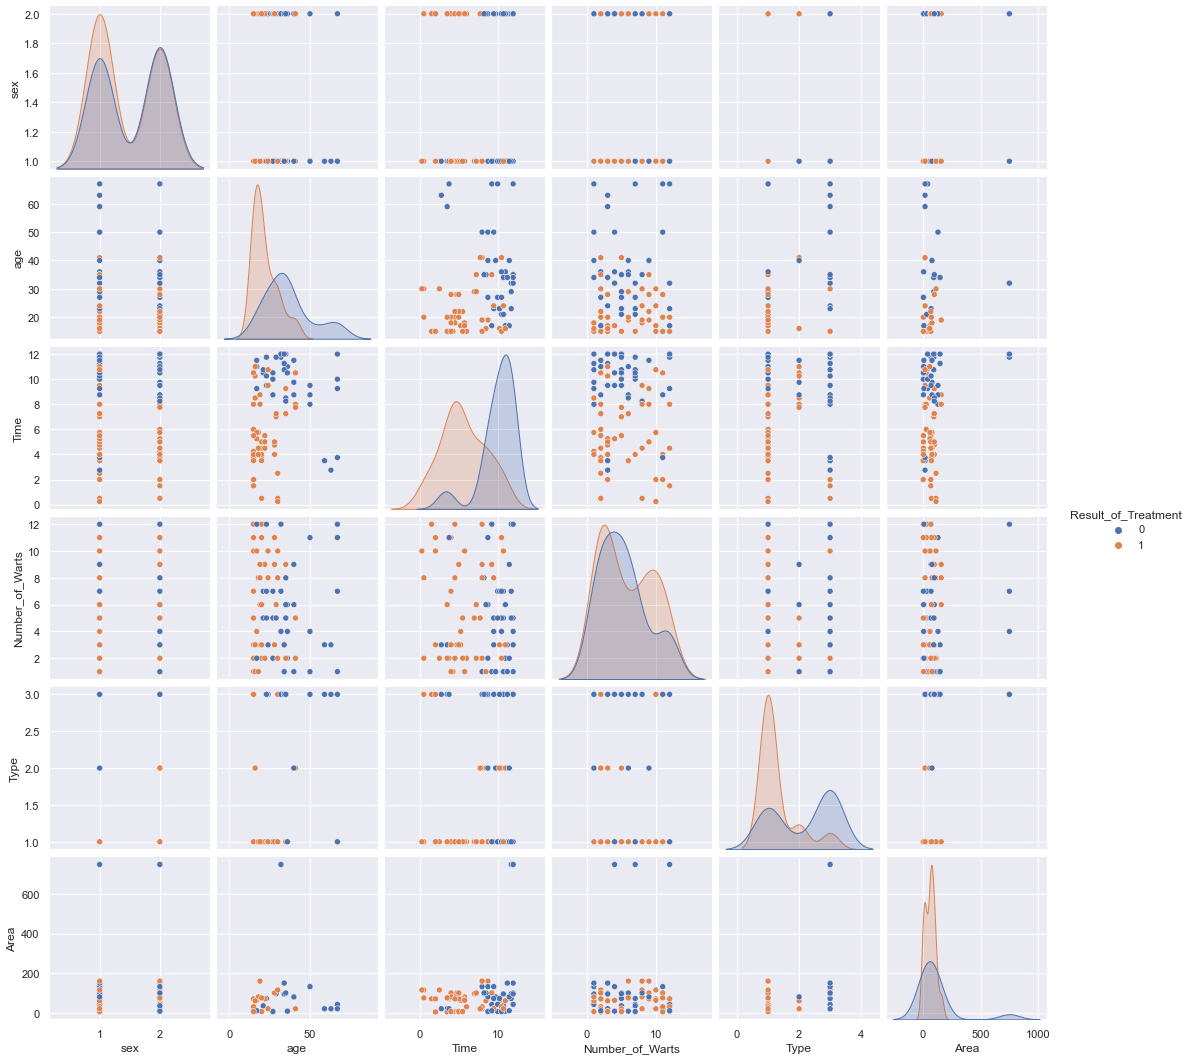

In [411]:
plt.figure(figsize=(12,8))
pairplot = sns.pairplot(data=df, hue='Result_of_Treatment', kind='scatter')
plt.show(pairplot)

> ## Categorical Data
___

In [412]:
# Select Categorical Data
df_cat = df.loc[:,['sex','Type','Result_of_Treatment']]
df_cat.head(5)

,sex,Type,Result_of_Treatment
0,1,1,0
1,1,1,1
2,1,3,0
3,1,3,0
4,1,1,0


> ### Sex
___

In [413]:
# Replace 1,2 in sex with more explainable data
df_cat['sex'].replace({1:'M', 2:'F'}, inplace=True)
df_cat['sex'].head(5)

0    M
1    M
2    M
3    M
4    M
Name: sex, dtype: object

In [414]:
# Check amount number of each class in feature
pd.value_counts(df_cat['sex'])

M    47
F    43
Name: sex, dtype: int64

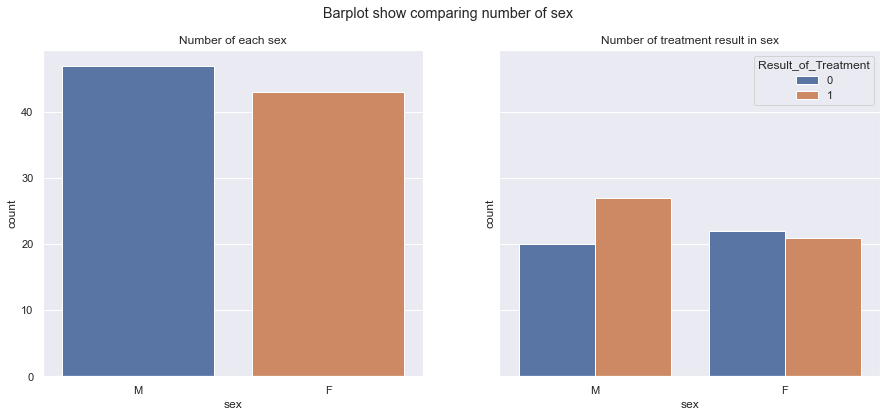

In [415]:

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
plt.suptitle('Barplot show comparing number of sex')

sns.set_theme(style='darkgrid')
axes[0].set_title('Number of each sex')
plot1 = sns.countplot(ax=axes[0], data=df_cat, x='sex')

axes[1].set_title('Number of treatment result in sex')
plot2 = sns.countplot(ax=axes[1], data=df_cat, x='sex', hue='Result_of_Treatment', dodge=True)

plt.show()

According to the chart above, the number of patient from dataset in both Male & Female are close together.
but for in treatment result Male seem to have a higher chance to get better result after treatment by cryotherapy.

> ### Type
___
Features type means the type of Wart that patient have which can listed as below.
* 1) Common Wart
* 2) Plantar Wart
* 3) Both type of Wart
    

In [416]:
df_cat['Type'].replace({1:'common', 2:'plantar', 3:'both'}, inplace=True)
df_cat['Type'].head(5)

0    common
1    common
2      both
3      both
4    common
Name: Type, dtype: object

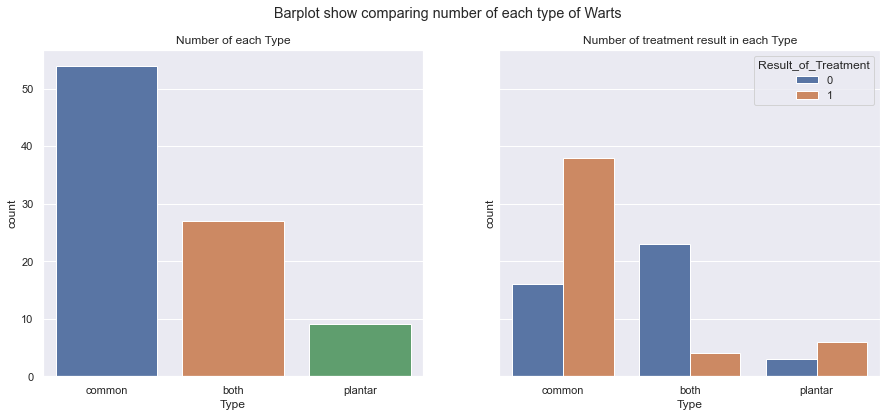

In [417]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
plt.suptitle('Barplot show comparing number of each type of Warts')

sns.set_theme(style='darkgrid')
axes[0].set_title('Number of each Type')
plot1 = sns.countplot(ax=axes[0], data=df_cat, x='Type')

axes[1].set_title('Number of treatment result in each Type')
plot2 = sns.countplot(ax=axes[1], data=df_cat, x='Type', hue='Result_of_Treatment', dodge=True)

plt.show()

From bar chart above, it seem like most of the patients got "Common Wart" and the least of them got "Plantar Wart".
but when looking in the detail of Treatment Result, The Common type of wart tend to have a higer-chance to getter better after cryotherapy treatment among other type.
and the patients who got "Both" type of warts are likely to have a failure result after cryotherapy treatment.

> ### Finding correlation of all categorical data
___
Because we can not implement same correlation calculating method with both categorical and continuous data, so I plan to seperatly calculate categorical data and continuous data.
For finding correlation score of categorical data, I've select "Cramer-V" method due to it's capability to work with finding correlation between 2 categorical data and the score of this method is interpretable, the score of this type of correlation will be in range of 0 (Non-Correlation) to 1 (Highly-Correlation)

In [418]:
# Correlation of Categorical features using Cramer-V

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return (stat/(obs*mini))

rows= []

for var1 in df_cat:
  col = []
  for var2 in df_cat :
    cramers =cramers_V(df_cat[var1], df_cat[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
cramers_tab = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

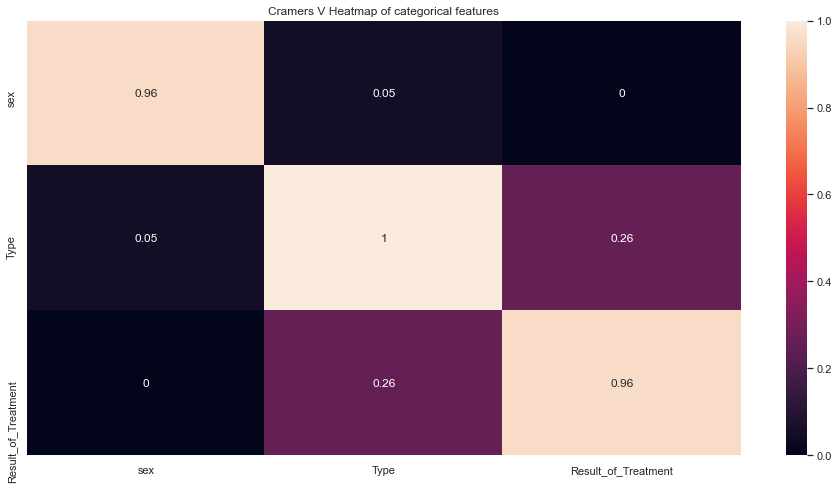

In [419]:
plt.figure(figsize=(16,8))
plt.title('Cramers V Heatmap of categorical features')
cramers_heatmap = sns.heatmap(data=cramers_tab, annot=True, vmin=0, vmax=1)

From the Cramer's V heatmap above, it can be interpreted that there is no Correlation between "sex" and "Result of Treatment", but there is some small correlation between "Type of Wart" and "Result of Treatment".

> ## Continuous Data
___

In [420]:
# select only continuous data
df_con = df.drop(columns=['sex','Type'])
df_con

,age,Time,Number_of_Warts,Area,Result_of_Treatment
0,35,12.00,5,100,0
1,29,7.00,5,96,1
2,50,8.00,1,132,0
3,32,11.75,7,750,0
4,67,9.25,1,42,0
...,...,...,...,...,...
85,34,12.00,3,95,0
86,20,3.50,6,75,1
87,35,8.25,8,100,0
88,24,10.75,10,20,1


> ### age
___

Text(0.5, 1.0, 'Boxplot of age & Treatment Result')

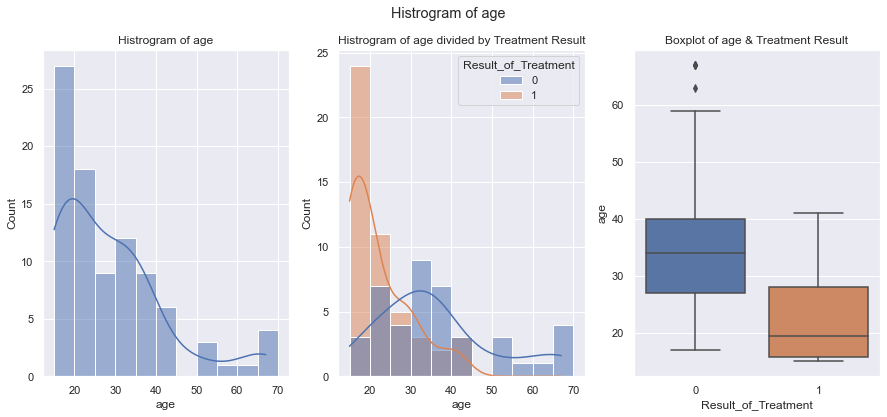

In [421]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle('Histrogram of age')
sns.histplot(ax=axes[0], data=df_con, x='age', kde=True, binwidth=5)
axes[0].set_title('Histrogram of age')
sns.histplot(ax=axes[1], data=df_con, x='age', hue='Result_of_Treatment', kde=True, binwidth=5)
axes[1].set_title('Histrogram of age divided by Treatment Result')
sns.boxplot(ax=axes[2], data=df_con, x='Result_of_Treatment', y='age')
axes[2].set_title('Boxplot of age & Treatment Result')

From the histrogram of 'Age' above, it is show that most of our patient have age around 15-40 and the histrogram is also represented that the younger patient tend to have a better result after taking a cryotherapy treatment.

> ### Time
___

Text(0.5, 1.0, 'Boxplot of Time & Treatment Result')

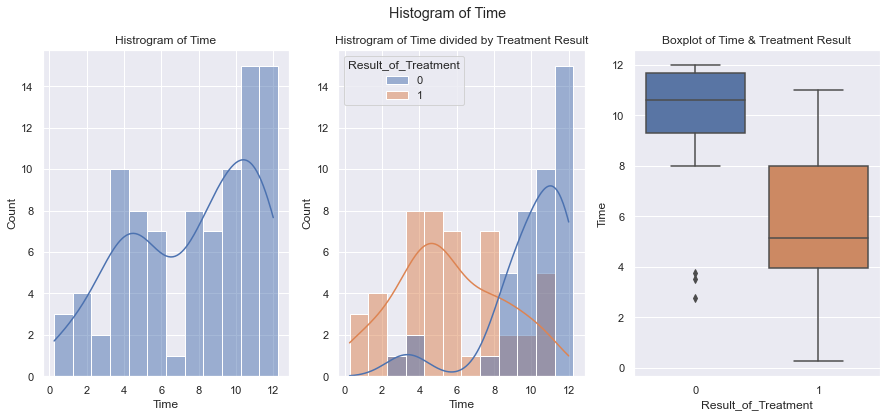

In [422]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
plt.suptitle('Histogram of Time')
sns.histplot(ax=axes[0], data=df_con, x='Time', kde=True, binwidth=1)
axes[0].set_title('Histrogram of Time')
sns.histplot(ax=axes[1], data=df_con, x='Time', hue='Result_of_Treatment', kde=True, binwidth=1)
axes[1].set_title('Histrogram of Time divided by Treatment Result')
sns.boxplot(ax=axes[2], data=df_con, x='Result_of_Treatment', y='Time')
axes[2].set_title('Boxplot of Time & Treatment Result')

From the histrogram of time, most of the patients got wart before treatment for around 8-11 month. when compare with Treatment Result, it seem like the patients that have lower time before treatment tend to have a better result after treatment. The rate of failure in treatment got significantly higher after 8 month if the patients did take any treatment as we can see in boxplot on the right-end.

> ### Number of warts
___

<AxesSubplot:xlabel='Result_of_Treatment', ylabel='Number_of_Warts'>

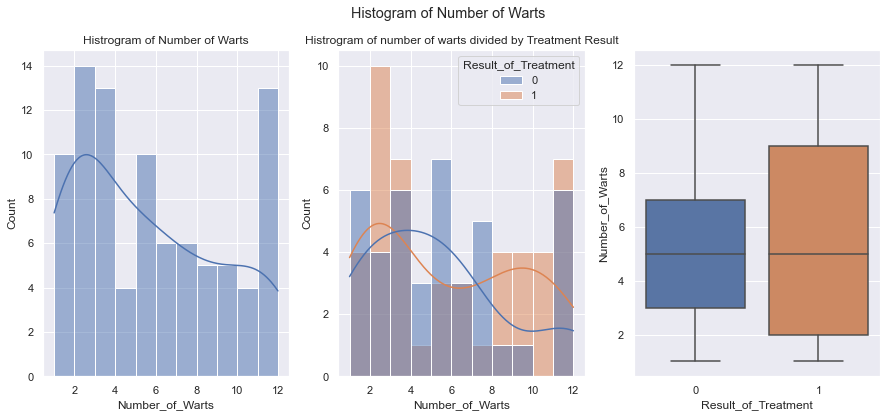

In [423]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
plt.suptitle('Histogram of Number of Warts')
sns.histplot(ax=axes[0], data=df_con, x='Number_of_Warts', kde=True, binwidth=1)
axes[0].set_title('Histrogram of Number of Warts')
sns.histplot(ax=axes[1], data=df_con, x='Number_of_Warts', hue='Result_of_Treatment', kde=True, binwidth=1)
axes[1].set_title('Histrogram of number of warts divided by Treatment Result')
sns.boxplot(ax=axes[2], data=df_con, x='Result_of_Treatment', y='Number_of_Warts')


From the histrogram show the distribution in number of warts, it is show that most of the patient have warts around 2-4 warts, and for the right side chart that divided by Treatment Result  there is no significant in result treatment between each warts number.

> ### Area
___
'Area' feature means the area of warts on the skin that the patient have in unit of Square Millimeter (mm^2)

Text(0.5, 1.0, 'Boxplot of Area & Treatment Result')

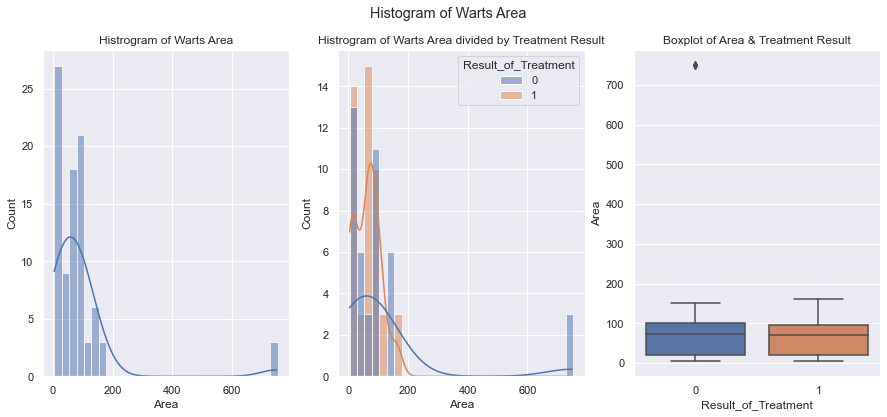

In [424]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
plt.suptitle('Histogram of Warts Area')
sns.histplot(ax=axes[0], data=df_con, x='Area', kde=True, binwidth=25)
axes[0].set_title('Histrogram of Warts Area')
sns.histplot(ax=axes[1], data=df_con, x='Area', hue='Result_of_Treatment', kde=True, binwidth=25)
axes[1].set_title('Histrogram of Warts Area divided by Treatment Result')
sns.boxplot(ax=axes[2], data=df_con, x='Result_of_Treatment', y='Area')
axes[2].set_title('Boxplot of Area & Treatment Result')


From the histrogram of Warts Area that show above, It is show that most of patient got Warts Area around 0-100 mm2, but there is no much influence of Warts area on Treatment Result.

> ### Finding correlation of all continuous
___
As I mentions before, that we can not implement the same correlation method on both categorical and continuous features, so in this part i will show only the correlation with continuous featrues. However our class label is still Categorical data, but it was a binary-class label, so I will implement "Pearson Correlation" with all continuous features and the class label, The pearson correlation will called "point-biserial corelation" when finding correlation between continuous features and binary-categorical feature. The result of correlation calculation is show as a Heatmap down below.

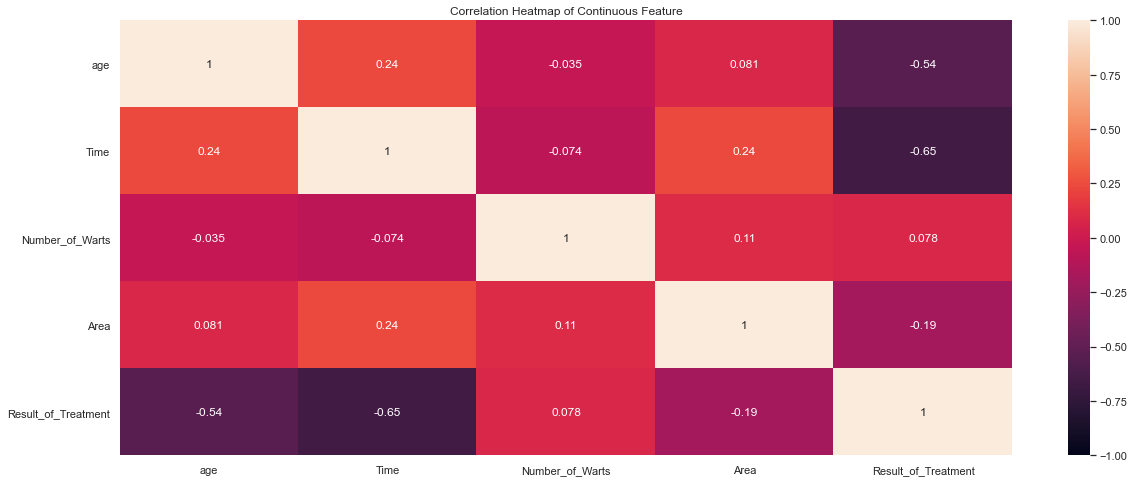

In [425]:
plt.figure(figsize=(20,8))
plt.title('Correlation Heatmap of Continuous Feature')
heatmap = sns.heatmap(df_con.corr(method='pearson'), annot=True, vmin=-1, vmax=1)

From the correlation Heatmap of Continuous features and class label, it is show that 'Age' of patient and 'Time' of when patient have warts without medication have a strong negative correlation with result of treatment with can be interpreted that "The more age and longer time before taking medication can lead to failure in treatment" for other features like Number_of_Warts it seem like there is no correlation with the result of treatment and for Area there is a small negative correlation with result of treatment with can be interpreted that "The bigger of warts area that patient have can lead to more failure in treatment result"

> ### EDA Conclusion
___
For the EDA step of this dataset, I can conluded that this dataset is about the cryotherapy treatment on warts, and to make the treatment result positve, the patients themselves can be any sex becasue sex got no correlation with treatment result but they should have common warts according to the barchart above common warts got high chance to have positive result after treatment. and the patients should be young and take the medication as soon as possible  after they got warts on the body due to strong negative correlation with treatment result and the area of warts on thei body should be small. if the patients have these attribute as mention so they are highly chance for them to get better after cryotherapy treatment.

# Data Cleaning
___
From EDA Process we have noticed that there is an oultlier in some features including 'Age', 'Time' & 'Area', but our dataset have a small amount of instance so we can not drop out any outlier. then  I will cure the outlier by using 

# Data Preprocessing
___
since we have, 2 categorical data in our dataset, which is not ordinal data, so we can not impute number as 1,2,3... but need to use encoder indeed. so in this part, I planned to impute data in sex & Type from number into label and encode them. and for continuous data such as age, time, number_of_warts and area all of these data got widely range of data that can be effect to our model performance. so all of these data need to be scaling berfore using in modeling stage.

> ## Imputation & Encoding on categorical features
___
-  ### Sex

In [426]:
df['sex'] = df['sex'].replace({1:'M', 2:'F'})
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,M,35,12.00,5,1,100,0
1,M,29,7.00,5,1,96,1
2,M,50,8.00,1,3,132,0
3,M,32,11.75,7,3,750,0
4,M,67,9.25,1,1,42,0


In [427]:
# Encode Variable as dummies
df = pd.get_dummies(data=df, columns=['sex'], sparse=False)

# Re-index of columns 
new_col = ['sex_F','sex_M','age','Time','Number_of_Warts','Type','Area','Result_of_Treatment']
df = df[new_col]
df.head()

,sex_F,sex_M,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,0,1,35,12.00,5,1,100,0
1,0,1,29,7.00,5,1,96,1
2,0,1,50,8.00,1,3,132,0
3,0,1,32,11.75,7,3,750,0
4,0,1,67,9.25,1,1,42,0


> -  ### Type

In [428]:
# Impute data with label
df['Type'] = df['Type'].replace({1:'common', 2:'plantar', 3:'both'})
df.head()

,sex_F,sex_M,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,0,1,35,12.00,5,common,100,0
1,0,1,29,7.00,5,common,96,1
2,0,1,50,8.00,1,both,132,0
3,0,1,32,11.75,7,both,750,0
4,0,1,67,9.25,1,common,42,0


In [429]:
df = pd.get_dummies(data=df, columns=['Type'], sparse=False)
new_col = ['sex_F','sex_M','age','Time','Number_of_Warts','Type_common','Type_plantar','Type_both','Area','Result_of_Treatment']
df = df[new_col]
df.head()

,sex_F,sex_M,age,Time,Number_of_Warts,Type_common,Type_plantar,Type_both,Area,Result_of_Treatment
0,0,1,35,12.00,5,1,0,0,100,0
1,0,1,29,7.00,5,1,0,0,96,1
2,0,1,50,8.00,1,0,0,1,132,0
3,0,1,32,11.75,7,0,0,1,750,0
4,0,1,67,9.25,1,1,0,0,42,0


> ## Scaling on continuous features
___
For Data scaling on continuos Data, I will use "MinMax Scalig" method, because continuous features of the dataset are on different measurement scale, so using MinMax Scaling can solve this problem by normalize every continuous features into 0-1 range.

In [430]:
continuous_features = [
    'age',
    'Time',
    'Number_of_Warts',
    'Area'
]

def min_max(data):
    min = data.min()
    max = data.max()

    max_min_diff = max - min
    scale = (data-min)/max_min_diff
    scale = round(scale, 4)

    return scale

for i in continuous_features:
    df[i] = min_max(df[i])

df

,sex_F,sex_M,age,Time,Number_of_Warts,Type_common,Type_plantar,Type_both,Area,Result_of_Treatment
0,0,1,0.3846,1.0000,0.3636,1,0,0,0.1287,0
1,0,1,0.2692,0.5745,0.3636,1,0,0,0.1233,1
2,0,1,0.6731,0.6596,0.0000,0,0,1,0.1716,0
3,0,1,0.3269,0.9787,0.5455,0,0,1,1.0000,0
4,0,1,1.0000,0.7660,0.0000,1,0,0,0.0509,0
...,...,...,...,...,...,...,...,...,...,...
85,1,0,0.3654,1.0000,0.1818,0,0,1,0.1220,0
86,1,0,0.0962,0.2766,0.4545,1,0,0,0.0952,1
87,1,0,0.3846,0.6809,0.6364,0,0,1,0.1287,0
88,0,1,0.1731,0.8936,0.8182,1,0,0,0.0214,1


In [431]:
#Exoport Processed data as CSV
df.to_csv('cryotherapy_processed.csv')